In [16]:
import random


class WirelessNode:
    name = ""
    connected = False
    accepting_wireless_connections = False
    primary_radio = 0
    secondary_radio = 0
    number_of_channels = 0
    id = 0

    def __init__(self, name="default", id=0, number_of_channels=0):
        self.name = name
        self.id = id
        self.number_of_channels = number_of_channels

    def print_hello_world(self):
        print("hello world")

    def print_radio_channels(self):
        print("Node: ", self.name, ", Primary radio: ", self.primary_radio, ", Secondary radio:", self.secondary_radio)

    def scan_for_devices(self):
        other_devices = False
        any_devices = False
        #
        return False, False

    def scan_for_any_devices(self):
        return False

    def fig6_method(self):
        other_devices_detected = False
        any_devices_detected = False
        other_devices_detected, any_devices_detected = self.scan_for_devices()

        if other_devices_detected:
            # react_to_devices_detected()
            pass

        elif any_devices_detected:
            # react_to_any_devices_detected()
            pass

        else:
            # set_all_channels_at_random()
            # We will replace set_all_channels_at_random with a machine learning algorithm
            self.primary_radio = self.set_random_channel()
            self.secondary_radio = self.set_random_channel()

    def set_smart_channel(self):
        pass

    def set_num_channels(self, num):
        self.number_of_channels = num

    def set_random_channel(self):
        random_number = random.randint(1, self.number_of_channels)
        return random_number

    def random_remainder(self):
        flag_primary = False
        flag_secondary = False
        number_of_channels = self.number_of_channels
        remainder = number_of_channels + 1
        while not flag_primary:
            if self.primary_radio == number_of_channels:
                self.primary_radio = random.randint(1, number_of_channels)
            elif self.primary_radio == 0:
                self.primary_radio = random.randint(1, number_of_channels)
            else:
                self.primary_radio = (self.primary_radio * random.randint(1, number_of_channels)) % remainder
            if self.primary_radio != 0:
                flag_primary = True
        while not flag_secondary:
            if self.secondary_radio == 0:
                self.secondary_radio = random.randint(1, number_of_channels)
            elif self.secondary_radio == number_of_channels:
                self.secondary_radio = random.randint(1, number_of_channels)
            else:
                self.secondary_radio = (self.secondary_radio * random.randint(1, number_of_channels)) % remainder
            if self.secondary_radio != 0:
                flag_secondary = True

In [14]:


class InstaMeshSimulation:
    flag = False
    wireless_nodes = []

    def __init__(self, name="default"):
        self.name = name
        self.wireless_nodes = []

    def add_node(self, number_of_nodes, number_of_channels):
        self.wireless_nodes.append(
            WirelessNode("node " + str(number_of_nodes), len(self.wireless_nodes), number_of_channels))

    def make_nodes(self, number_of_nodes, number_of_channels):
        for x in range(0, number_of_nodes):
            self.wireless_nodes.append(WirelessNode("node " + str(x), x, number_of_channels))

    def set_num_channels(self, number_of_channels):
        for x in range(0, len(self.wireless_nodes)):
            self.wireless_nodes[x].set_num_channels(number_of_channels)

    def random_nodes(self):
        for x in range(0, len(self.wireless_nodes)):
            self.wireless_nodes[x].fig6_method()

    def random_remainder(self):
        for x in range(0, len(self.wireless_nodes)):
            self.wireless_nodes[x].random_remainder()

    def print_name(self):
        print(self.name)

    def print_nodes_info(self):
        for x in range(0, len(self.wireless_nodes)):
            print("node: ", self.wireless_nodes[x].name)

    def run_nodes(self):
        flag = False
        for y in range(1, len(self.wireless_nodes)):
            flag = self.radios_on_same_channel(self.wireless_nodes[0], self.wireless_nodes[y])
            if flag:
                return flag
        return flag

    def radios_on_same_channel(self, node_a, node_b):
        if node_a.primary_radio == node_b.primary_radio:
            return True
        elif node_a.primary_radio == node_b.secondary_radio:
            return True
        elif node_a.primary_radio == node_b.primary_radio:
            return True
        elif node_a.primary_radio == node_b.secondary_radio:
            return True
        else:
            return False

    def delete_nodes(self):
        self.wireless_nodes.clear()

Instamesh Simulation
num nodes:  2  -  1000  runs - iteration per run until matching nodes:  8.258
num nodes:  3  -  1000  runs - iteration per run until matching nodes:  4.375
num nodes:  4  -  1000  runs - iteration per run until matching nodes:  2.727
num nodes:  5  -  1000  runs - iteration per run until matching nodes:  2.273
num nodes:  6  -  1000  runs - iteration per run until matching nodes:  1.741
num nodes:  7  -  1000  runs - iteration per run until matching nodes:  1.519
num nodes:  8  -  1000  runs - iteration per run until matching nodes:  1.281
num nodes:  9  -  1000  runs - iteration per run until matching nodes:  1.066
num nodes:  10  -  1000  runs - iteration per run until matching nodes:  0.92
num nodes:  11  -  1000  runs - iteration per run until matching nodes:  0.758
num nodes:  12  -  1000  runs - iteration per run until matching nodes:  0.626
num nodes:  13  -  1000  runs - iteration per run until matching nodes:  0.519
num nodes:  14  -  1000  runs - iteratio

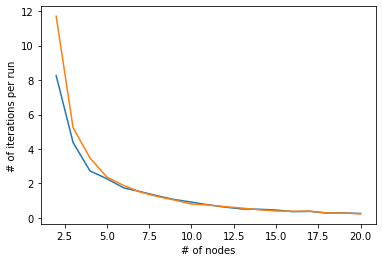

In [17]:

# this app is to simulate the breadcrumb nodes
# the current goal is to improve the results in figure 6
import matplotlib.pyplot as plt
import numpy as np


def run_simulation(num_nodes, max_nodes, iterations, instamesh_simulation, number_of_channels, type="random"):
    labels = []
    instamesh_simulation.delete_nodes()
    instamesh_simulation.make_nodes(num_nodes, number_of_channels)
    while num_nodes <= max_nodes:
        sum = 0
        x = 0
        while x < iterations:
            count = 0
            flag = False
            instamesh_simulation.random_nodes()
            while not flag:
                flag = instamesh_simulation.run_nodes()
                if flag:
                    break
                if type == "random":
                    instamesh_simulation.random_nodes()
                elif type == "random_remainder":
                    instamesh_simulation.random_remainder()
                else:
                    pass
                count = count + 1
            x = x + 1
            sum += count
        print("num nodes: ", num_nodes, " - ", iterations, " runs - iteration per run until matching nodes: ",
              sum / iterations)
        labels.append(sum / iterations)
        num_nodes = num_nodes + 1
        instamesh_simulation.add_node(num_nodes, number_of_channels)
    return labels


def main():
    print("Instamesh Simulation")
    num_nodes = 2
    max_nodes = 20
    number_of_channels = 24
    instamesh_simulation = InstaMeshSimulation("Simulation_1")
    iterations = 1000

    labels_remainder = run_simulation(num_nodes, max_nodes, iterations, instamesh_simulation, number_of_channels,
                                      "random_remainder")
    labels_fig_6 = run_simulation(num_nodes, max_nodes, iterations, instamesh_simulation, number_of_channels, "random")

    r = np.linspace(2, max_nodes, max_nodes - 1)
    plt.plot(r, labels_remainder)
    plt.plot(r, labels_fig_6)
    plt.xlabel('# of nodes')
    plt.ylabel('# of iterations per run')
    plt.show()


if __name__ == '__main__':
    main()
